In [20]:
%config Completer.use_jedi = False
pd.options.display.max_columns = None

In [99]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [46]:
df_cars=pd.read_csv('ML_cars.csv')

In [22]:
df_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [47]:
df_cars.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [97]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    int64  
 1

In [98]:
df_cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Analizamos los registros duplicados

In [25]:
data_duplicates_df_cars =  df_cars.duplicated(subset=["car_ID"], keep="first")
print("registros duplicados en df_cars (car id): ", any(data_duplicates_df_cars))

registros duplicados en df_cars (car id):  False


In [52]:
df_cars.cylindernumber.unique()

array(['4', '6', '5', '3', '12', '2', '8'], dtype=object)

In [50]:
inicial = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
cambio= ['4','6','5','3','12','2','8']

In [57]:
dic = dict(zip(inicial, cambio))
# Realizar el reemplazo basado en el diccionario
df_cars['cylindernumber'] = df_cars['cylindernumber'].replace(dic)
df_cars['cylindernumber']=df_cars['cylindernumber'].astype(float)

In [58]:
variables_numericas = df_cars[['car_ID', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [72]:
variables_numericas_sin_precio = df_cars[['car_ID', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [59]:
variables_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   cylindernumber    205 non-null    float64
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

In [68]:
variables_numericas.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [88]:
variables_numericas_box1 = df_cars[[
       'carlength', 'enginesize', 'horsepower']]

In [89]:
variables_numericas_box2 = df_cars[[ 'wheelbase', 'carwidth', 'carheight'
       , 'citympg', 'highwaympg']]

In [92]:
variables_numericas_box3 =  df_cars[[ 'curbweight','peakrpm']]

In [95]:
variables_numericas_box4= df_cars[['boreratio','stroke','compressionratio']]

<AxesSubplot:>

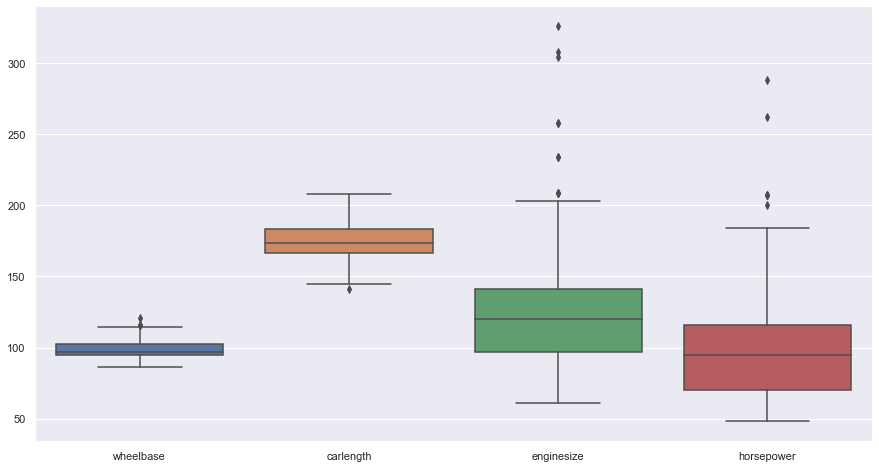

In [87]:
sns.boxplot(data=variables_numericas_box1)

<AxesSubplot:>

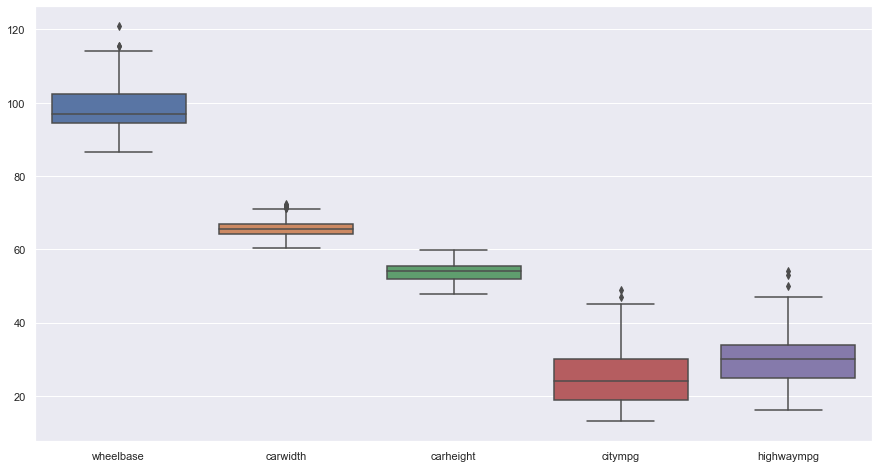

In [90]:
sns.boxplot(data=variables_numericas_box2)

<AxesSubplot:>

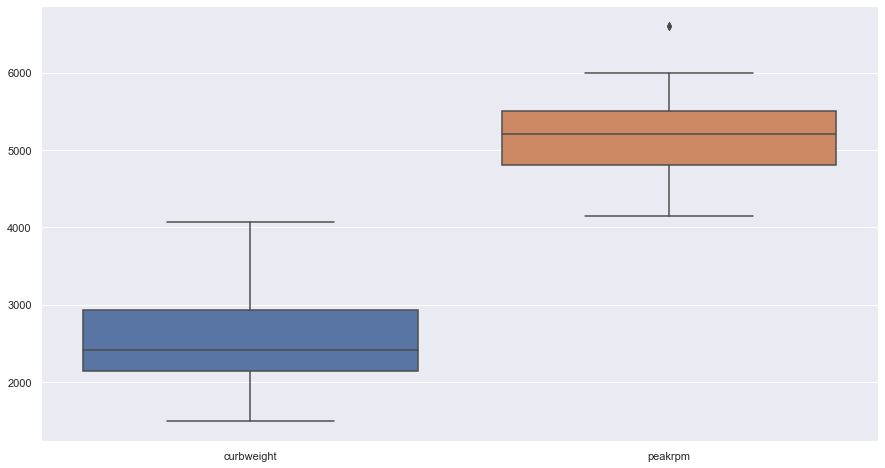

In [93]:
sns.boxplot(data=variables_numericas_box3)

<AxesSubplot:>

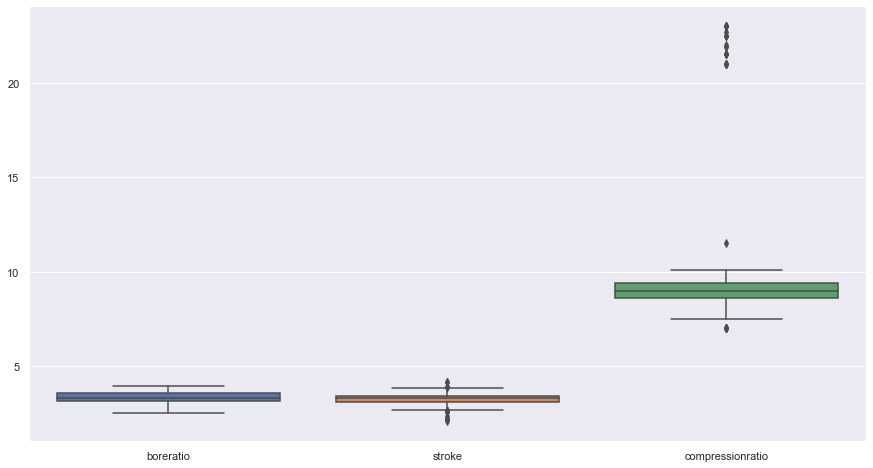

In [96]:
sns.boxplot(data=variables_numericas_box4)

In [64]:
corr_variables_numericas = variables_numericas.corr()

<AxesSubplot:>

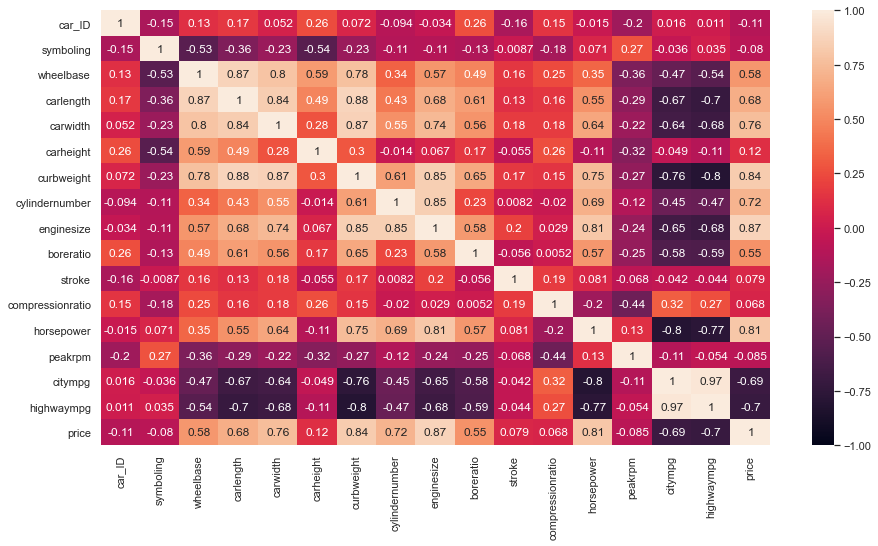

In [67]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_variables_numericas,annot=True, vmax=1,vmin=-1)

In [27]:
varibales_categoricas =['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'fuelsystem']